In [ ]:
# importing the packages that will be used in this code
import numpy as np                   # for the operations with matrices and vectors
import matplotlib.pyplot as plt      # for visualizations
#from scipy.stats import levy_stable  # for generating samples from S_{\alpha}(1,0,0)
portfolio_of_functions = {}
portfolio_of_functions.update({'sin(x)       ': np.vectorize(lambda x: np.sin(x))})
portfolio_of_functions.update({'x            ': np.vectorize(lambda x: x)})
portfolio_of_functions.update({'x**2         ': np.vectorize(lambda x: x*x)})
portfolio_of_functions.update({'x**3         ': np.vectorize(lambda x: x*x*x)})
portfolio_of_functions.update({'x**4         ': np.vectorize(lambda x: x*x*x*x)})
portfolio_of_functions.update({'x**5         ': np.vectorize(lambda x: x**5)})
portfolio_of_functions.update({'min(x**2,x)  ': np.vectorize(lambda x: min(x*x,x))})
portfolio_of_functions.update({'min(x**3,x)  ': np.vectorize(lambda x: min(x*x*x,x))})
portfolio_of_functions.update({'min(x^3,x^5) ': np.vectorize(lambda x: min(x**3,x**5))})
portfolio_of_functions.update({'sqrt(x)      ': np.vectorize(lambda x: min(x*x,x))})
portfolio_of_functions.update({'cos(x)       ': np.vectorize(lambda x: np.cos(x)*(x != 0)  )})
portfolio_of_functions.update({'x*exp(-x)    ': np.vectorize(lambda x: (x>1)*x**2+x*np.exp(-x))})
portfolio_of_functions.update({'x**4*exp(-x) ': np.vectorize(lambda x: (x>1)*x**4+x*np.exp(-x))})

In [ ]:
KEY = list(portfolio_of_functions.keys())
fun = KEY[8]

In [ ]:
def A(a, T):
    A, B = np.meshgrid(T, T)
    matrix = np.exp(-abs(A + B)**a) + np.exp(-abs(A - B)**a)
    return matrix

def B(a, T):  
    T = np.array(T, dtype=np.float64)
    T[T == 0] = np.finfo(np.float64).eps
    y = -abs(T)**a * np.log(abs(T)) * np.exp(-abs(T)**a)
    return y

def F(X, T):
    X1 = np.outer(X, T)
    Y1 = np.cos(X1)
    FX = np.mean(Y1, axis=0)
    return 2*FX

def projection(FX, T, a):
    return abs(np.dot(np.dot(np.linalg.inv(A(a, T)), B(a, T)), FX))
    

def fisher_info(T, a):
    return 2*abs(np.dot(np.dot(np.linalg.inv(A(a, T)), B(a, T)), B(a, T)))    

In [ ]:
geom = np.vectorize(lambda x, a: 1/(1+abs(x)**a))

def Ag(a, T):
    n = T.shape[0]
    A, B = np.meshgrid(T, T)
    matrix = geom(A + B, a) + geom(A - B, a)
    return matrix

def Bg(a, T):  
    T = np.array(T, dtype=np.float64)
    T[T == 0] = np.finfo(np.float64).eps
    y = -abs(T)**a * np.log(abs(T)) * geom(T, a) * geom(T, a)
    return y

def F(X, T):
    X1 = np.outer(X, T)
    Y1 = np.cos(X1)
    FX = np.mean(Y1, axis=0)
    return 2*FX

def projectiong(FX, T, a):
    return abs(np.dot(np.dot(np.linalg.inv(Ag(a, T)), Bg(a, T)), FX))

def fisher_infog(T, a):
    return 2*abs(np.dot(np.dot(np.linalg.inv(Ag(a, T)), Bg(a, T)), Bg(a, T)))

In [ ]:
def binary_search_min_of_function_aux(fun, start, end):
    left, right = start, end
    epsilon = 1e-10  # tolerance for the precision of the minimum
    while (right - left) > epsilon:
        mid = (left + right) / 2
        if fun(mid) <= fun(mid + epsilon):
            right = mid
        else:
            left = mid
    return left, fun(mid)

def extended_binary_search(fun, start, end):
    LIST = []
    arr = np.linspace(start, end, 10)
    for i in range(len(arr)):
        if i < len(arr) - 1:
          alph, J = binary_search_min_of_function_aux(fun, arr[i], arr[i+1])
          LIST.append([alph, J])
        else:
          if arr[i] < 2:
            alph, J = binary_search_min_of_function_aux(fun, arr[i], 2)
            LIST.append([alph, J])            
    min_second = min(item[1] for item in LIST)
    INDEX = [item[1] for item in LIST].index(min_second)
    output = LIST[INDEX][0]
    return output

def straightforward_search(fun, start, end):
    Alpha = list(np.arange(start_alpha, end_alpha, 0.01))+[]
    crit = []
    for al in Alpha:
        y = fun(al)
        crit.append(y)
    argmin = np.argmin(crit)
    return Alpha[argmin]

def truncate_string(num):
    num = round(num, 4)
    num = str(num)
    new_string = num[:6]
    return new_string + "0" * (6 - len(new_string))

AVG = 0.7676, [m, delta] = [11, 0.01)].
AVG = 0.7358, [m, delta] = [2, 0.01)].
AVG = 0.5847, [m, delta] = [0.7, 0.01)].
AVG = 0.7507, [m, delta] = [3, 0.05)].
AVG = 0.7638, [m, delta] = [10, 0.05)].
AVG = 0.7541, [m, delta] = [15, 0.1)].
AVG = 0.7202, [m, delta] = [15, 0.2)].
AVG = 0.7513, [m, delta] = [5, 0.1)].
AVG = 0.7605, [m, delta] = [10, 0.07)].
AVG = 0.7202, [m, delta] = [30, 0.2)].


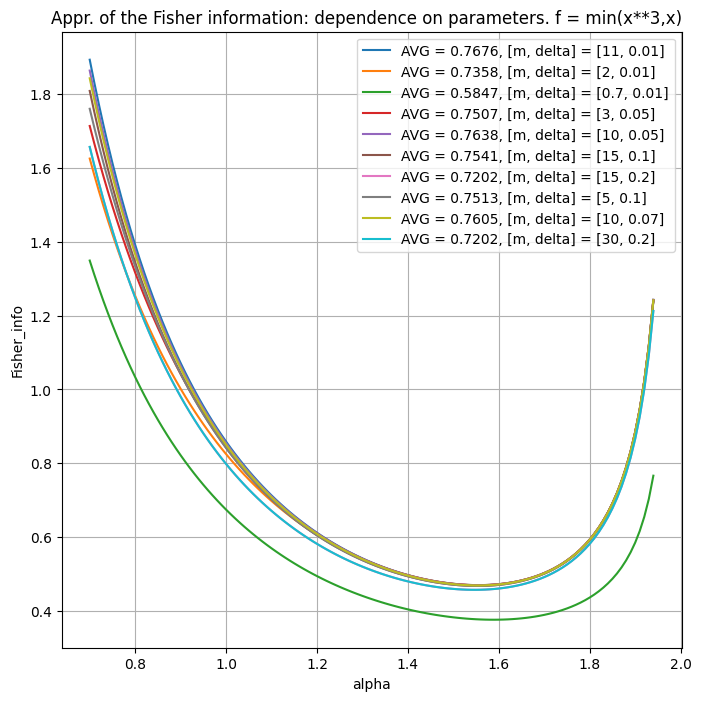

In [ ]:
# Fisher information dependent on m and delta
# Visual demonstration of how the initial values affect the shape of the Fisher information 
step_array = [0.01, 0.01, 0.01,  0.05,   0.05,  0.1,  0.2,  0.1,  0.07,  0.2]   # delta
max_val    = [11,   2   , 0.7,   3,      10,    15,   15,   5,    10,    30]    # m

k = KEY[7]
fig = plt.figure(figsize=(8, 8))
N = len(step_array)
LEGEND = []
for i in range(N):
  T = np.arange(0, max_val[i], step_array[i])
  T = portfolio_of_functions[k](T)
  Alphs = []
  Fishr = []
  for a in np.arange(0.7,1.95,0.01):
      Alphs.append(a)
      Fishr.append(fisher_info(T, a))
  plt.plot(Alphs, Fishr)
  LEGEND.append(f'AVG = {truncate_string(np.mean(Fishr))}, [m, delta] = [{max_val[i]}, {step_array[i]}]')
  print(f'AVG = {truncate_string(np.mean(Fishr))}, [m, delta] = [{max_val[i]}, {step_array[i]})].')

plt.xlabel('alpha')
plt.ylabel('Fisher_info')
plt.title(f'Appr. of the Fisher information: dependence on parameters. f = {k}')
plt.legend(LEGEND)
plt.grid()

AVG = 0.6723 for sin(x)       
AVG = 0.7187 for x            
AVG = 0.7600 for x**2         
AVG = 0.7626 for x**3         
AVG = 0.7614 for x**4         
AVG = 0.7592 for x**5         
AVG = 0.7604 for min(x**2,x)  
AVG = 0.7639 for min(x**3,x)  
AVG = 0.7622 for min(x^3,x^5) 
AVG = 0.7604 for sqrt(x)      
AVG = 0.6703 for cos(x)       
AVG = 0.7061 for x*exp(-x)    
AVG = 0.6957 for x**4*exp(-x) 


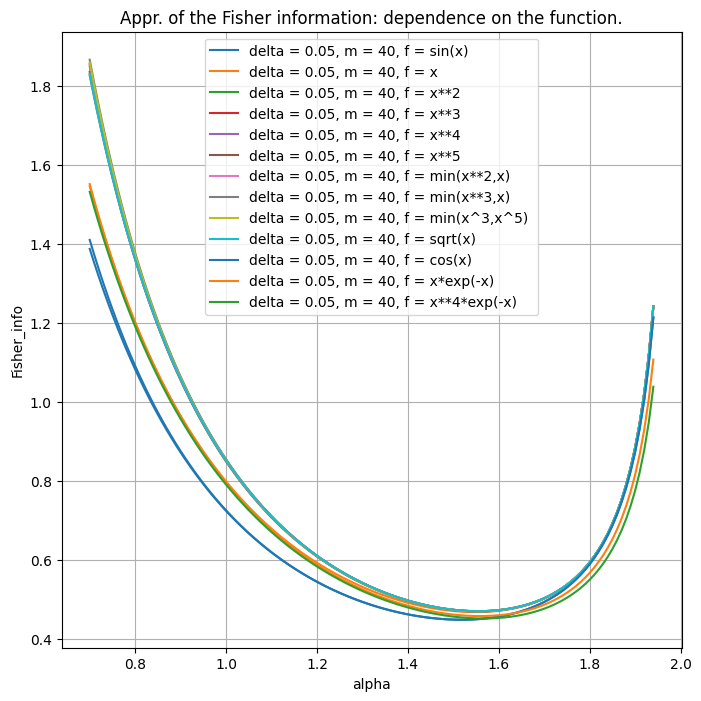

In [ ]:
# Visual demonstration of how the choice of the function affects the shape of the Fisher information
fig = plt.figure(figsize=(8, 8))
m = 40
delta = 0.05
LEGEND = []
for k in KEY:
  T = np.arange(0, m, delta)
  T = portfolio_of_functions[k](T)
  Alphs = []
  Fishr = []
  for a in np.arange(0.7,1.95,0.01):
      Alphs.append(a)
      Fishr.append(fisher_info(T, a))
  plt.plot(Alphs, Fishr)
  LEGEND.append(f'delta = {delta}, m = {m}, f = {k}')
  print(f'AVG = {truncate_string(np.mean(Fishr))} for {k}')

plt.xlabel('alpha')
plt.ylabel('Fisher_info')
plt.title('Appr. of the Fisher information: dependence on the function.')
plt.legend(LEGEND)
plt.grid()

AVG = 0.7375, [m, delta] = [11, 0.01)].
AVG = 0.5973, [m, delta] = [2, 0.01)].
AVG = 0.4757, [m, delta] = [0.7, 0.01)].
AVG = 0.6328, [m, delta] = [3, 0.05)].
AVG = 0.7281, [m, delta] = [10, 0.05)].
AVG = 0.7395, [m, delta] = [15, 0.1)].
AVG = 0.7069, [m, delta] = [15, 0.2)].
AVG = 0.6688, [m, delta] = [5, 0.1)].
AVG = 0.7248, [m, delta] = [10, 0.07)].
AVG = 0.7332, [m, delta] = [30, 0.2)].


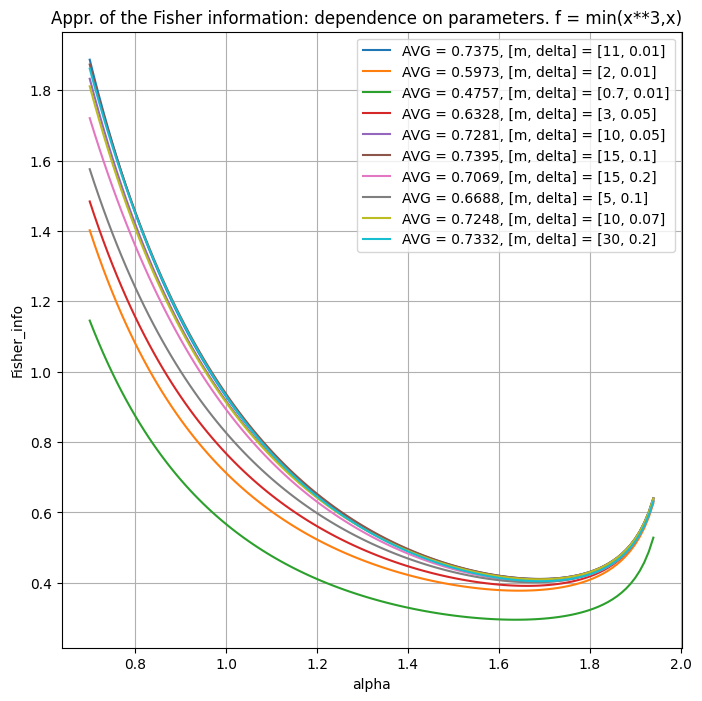

In [ ]:
# Fisher information dependent on m and delta
# Visual demonstration of how the initial values affect the shape of the Fisher information 
step_array = [0.01, 0.01, 0.01,  0.05,   0.05,  0.1,  0.2,  0.1,  0.07,  0.2]   # delta
max_val    = [11,   2   , 0.7,   3,      10,    15,   15,   5,    10,    30]    # m

k = KEY[7]
fig = plt.figure(figsize=(8, 8))
N = len(step_array)
LEGEND = []
for i in range(N):
  T = np.arange(0, max_val[i], step_array[i])
  T = portfolio_of_functions[k](T)
  Alphs = []
  Fishr = []
  for a in np.arange(0.7,1.95,0.01):
      Alphs.append(a)
      Fishr.append(fisher_infog(T, a))
  plt.plot(Alphs, Fishr)
  LEGEND.append(f'AVG = {truncate_string(np.mean(Fishr))}, [m, delta] = [{max_val[i]}, {step_array[i]}]')
  print(f'AVG = {truncate_string(np.mean(Fishr))}, [m, delta] = [{max_val[i]}, {step_array[i]})].')

plt.xlabel('alpha')
plt.ylabel('Fisher_info')
plt.title(f'Appr. of the Fisher information: dependence on parameters. f = {k}')
plt.legend(LEGEND)
plt.grid()

AVG = 0.5275 for sin(x)       
AVG = 0.7336 for x            
AVG = 0.8103 for x**2         
AVG = 0.8106 for x**3         
AVG = 0.8025 for x**4         
AVG = 0.7928 for x**5         
AVG = 0.7793 for min(x**2,x)  
AVG = 0.7831 for min(x**3,x)  
AVG = 0.8104 for min(x^3,x^5) 
AVG = 0.7793 for sqrt(x)      
AVG = 0.5255 for cos(x)       
AVG = 0.7641 for x*exp(-x)    
AVG = 0.7513 for x**4*exp(-x) 


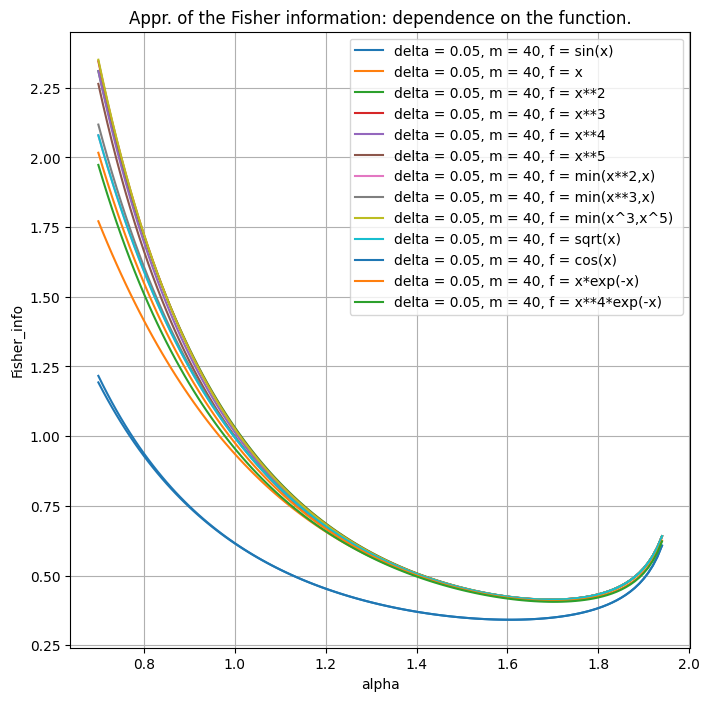

In [ ]:
# Visual demonstration of how the choice of the function affects the shape of the Fisher information
fig = plt.figure(figsize=(8, 8))
m = 40
delta = 0.05
LEGEND = []
for k in KEY:
  T = np.arange(0, m, delta)
  T = portfolio_of_functions[k](T)
  Alphs = []
  Fishr = []
  for a in np.arange(0.7,1.95,0.01):
      Alphs.append(a)
      Fishr.append(fisher_infog(T, a))
  plt.plot(Alphs, Fishr)
  LEGEND.append(f'delta = {delta}, m = {m}, f = {k}')
  print(f'AVG = {truncate_string(np.mean(Fishr))} for {k}')

plt.xlabel('alpha')
plt.ylabel('Fisher_info')
plt.title('Appr. of the Fisher information: dependence on the function.')
plt.legend(LEGEND)
plt.grid()

Text(0.5, 1.0, 'Comparison of FI of stable vs geometric stable')

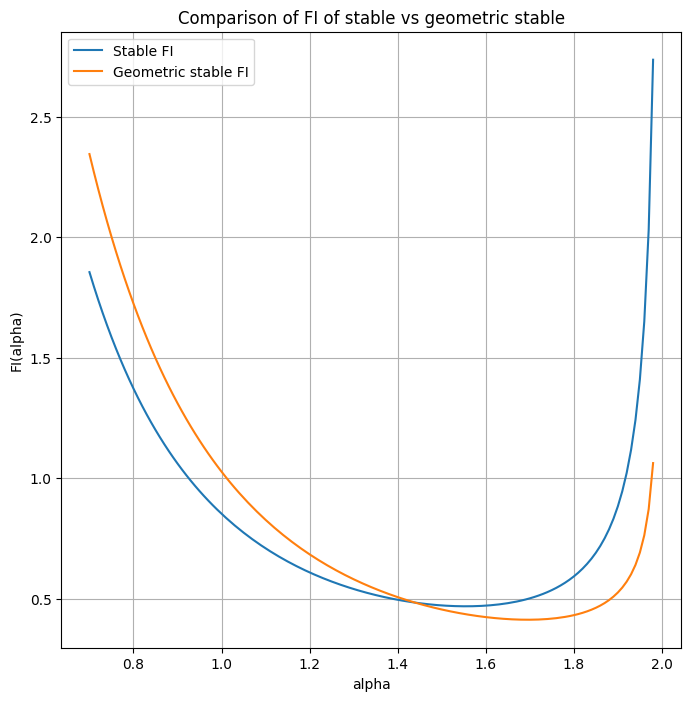

In [ ]:
Alphs = []
Fishr_g = []
Fishr_s = []
for a in np.arange(0.7,1.99,0.01):
    Alphs.append(a)
    T1 = np.arange(0, 40, 0.05)
    T1 = portfolio_of_functions[KEY[3]](T1)
    T2 = np.arange(0, 40, 0.05)
    T2 = portfolio_of_functions[KEY[3]](T2)      
    Fishr_s.append(fisher_info(T1, a))
    Fishr_g.append(fisher_infog(T2, a))
fig = plt.figure(figsize=(8, 8))
plt.plot(Alphs, Fishr_s)
plt.plot(Alphs, Fishr_g)
plt.legend(['Stable FI', 'Geometric stable FI'])
plt.xlabel('alpha')
plt.ylabel('FI(alpha)')
plt.grid()
plt.title('Comparison of FI of stable vs geometric stable')



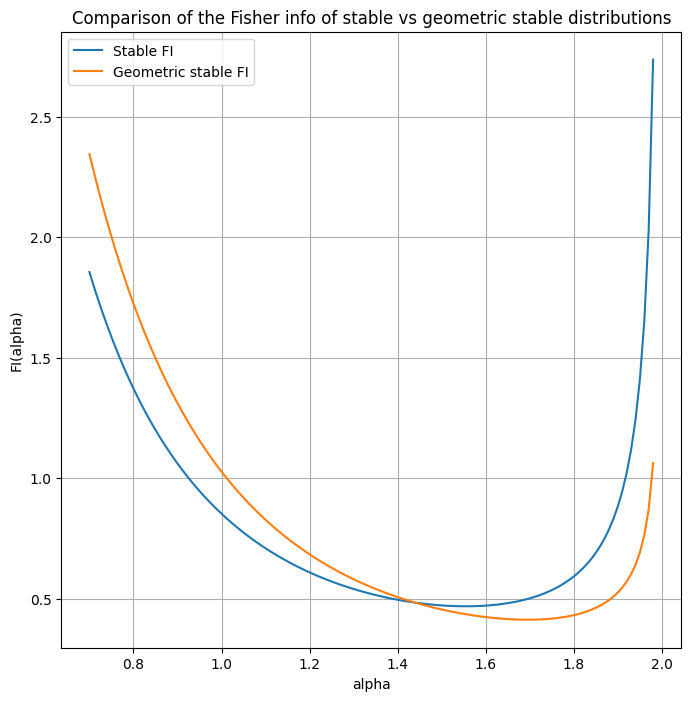

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.plot(Alphs, Fishr_s)
plt.plot(Alphs, Fishr_g)
plt.legend(['Stable FI', 'Geometric stable FI'])
plt.xlabel('alpha')
plt.ylabel('FI(alpha)')
plt.grid()
plt.title('Comparison of the Fisher info of stable vs geometric stable distributions')
plt.show()

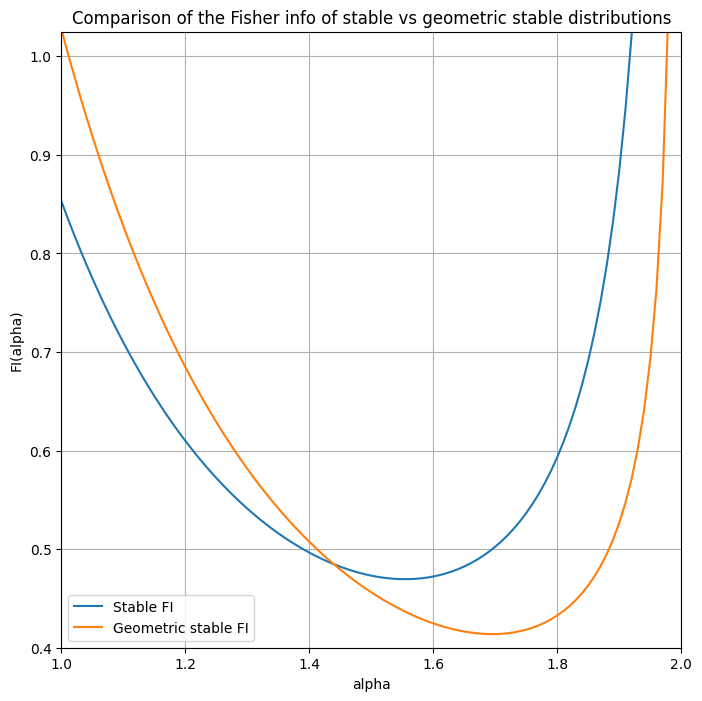

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.plot(Alphs, Fishr_s)
plt.plot(Alphs, Fishr_g)
plt.legend(['Stable FI', 'Geometric stable FI'])
plt.xlabel('alpha')
plt.ylabel('FI(alpha)')
plt.xlim([1, 2])
plt.ylim([0.4, 1.025])
plt.grid()
plt.title('Comparison of the Fisher info of stable vs geometric stable distributions')
plt.show()

In [ ]:
print('alphas:')
print(np.array(Alphs))
print('FI for stable:')
print(np.array(Fishr_s))
print('FI for geometric stable:')
print(np.array(Fishr_g))

alphas:
[0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 1.97 1.98]
FI for stable:
[1.85538534 1.79621571 1.73985088 1.68612613 1.63488837 1.58599515
 1.53931383 1.49472078 1.45210073 1.41134604 1.37235619 1.33503719
 1.29930113 1.2650657  1.23225378 1.20079307 1.17061578 1.14165823
 1.11386063 1.08716678 1.06152384 1.03688207 1.01319466 0.9904175
 0.96850902 0.94743003 0.92714356 0.90761468 0.8888104

In [ ]:
print(Alphs)

[0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.8400000000000001, 0.8500000000000001, 0.8600000000000001, 0.8700000000000001, 0.8800000000000001, 0.8900000000000001, 0.9000000000000001, 0.9100000000000001, 0.9200000000000002, 0.9300000000000002, 0.9400000000000002, 0.9500000000000002, 0.9600000000000002, 0.9700000000000002, 0.9800000000000002, 0.9900000000000002, 1.0000000000000002, 1.0100000000000002, 1.0200000000000002, 1.0300000000000002, 1.0400000000000003, 1.0500000000000003, 1.0600000000000003, 1.0700000000000003, 1.0800000000000003, 1.0900000000000003, 1.1000000000000003, 1.1100000000000003, 1.1200000000000003, 1.1300000000000003, 1.1400000000000003, 1.1500000000000004, 1.1600000000000004, 1.1700000000000004, 1.1800000000000004, 1.1900000000000004, 1.2000000000000004, 1.2100000000000004, 1.2200000000000004, 1.2300000000000004, 1.2400000000000004, 1.2500000000000004, 1.2600000000000005, 1.2700000000000005, 1.2800000

In [ ]:
print(Fishr_s)

[1.855385344162176, 1.7962157099672436, 1.7398508754857587, 1.6861261328456913, 1.6348883749846208, 1.5859951545929425, 1.5393138294017161, 1.494720784999684, 1.452100727354962, 1.41134603808732, 1.3723561863007185, 1.3350371914586687, 1.2993011323777024, 1.2650656979375654, 1.2322537755695233, 1.2007930739936699, 1.170615777039448, 1.1416582257058305, 1.1138606259045518, 1.0871667795845998, 1.0615238371638374, 1.036882069396535, 1.013194656986773, 0.9904174964201954, 0.9685090206316185, 0.9474300332563361, 0.9271435553300644, 0.9076146834072851, 0.8888104581626195, 0.8706997426247118, 0.8532531092691232, 0.8364427352658526, 0.8202423052399199, 0.804626920959816, 0.7895730174201652, 0.7750582848313571, 0.761061596070907, 0.7475629391900015, 0.7345433546031769, 0.7219848766211399, 0.7098704790154068, 0.6981840243301412, 0.686910216680656, 0.6760345578000118, 0.6655433061158408, 0.6554234386578126, 0.6456626156136973, 0.6362491473676123, 0.6271719638689055, 0.6184205861938801, 0.60998510

In [ ]:
print(Fishr_g)

[2.3450396128882733, 2.270375946194564, 2.198920545958646, 2.1305067531306086, 2.0649781735230195, 2.002187942536073, 1.941998050326573, 1.8842787219654162, 1.828907847625413, 1.775770458296305, 1.7247582429395054, 1.6757691033765927, 1.6287067435535871, 1.5834802901424954, 1.5400039417313787, 1.4981966441196166, 1.4579817894746767, 1.419286937324608, 1.3820435555566932, 1.3461867797694844, 1.3116551894843171, 1.2783905998648062, 1.2463378677197068, 1.2154447106790427, 1.1856615385340272, 1.156941295823001, 1.1292393148258846, 1.1025131782024098, 1.07672259057459, 1.0518292584115616, 1.0277967776280845, 1.0045905283546013, 0.9821775763803291, 0.9605265808088255, 0.9396077075016755, 0.919392547917484, 0.8998540429831782, 0.8809664116618265, 0.8627050839053794, 0.8450466377044039, 0.8279687399672508, 0.8114500909812257, 0.7954703722256256, 0.7800101973239163, 0.76505106593729, 0.7505753204163046, 0.7365661050408299, 0.723007327690887, 0.7098836238021655, 0.6971803224714084, 0.68488341458

Text(0.5, 1.0, 'Comparison of FI of stable vs geometric stable')

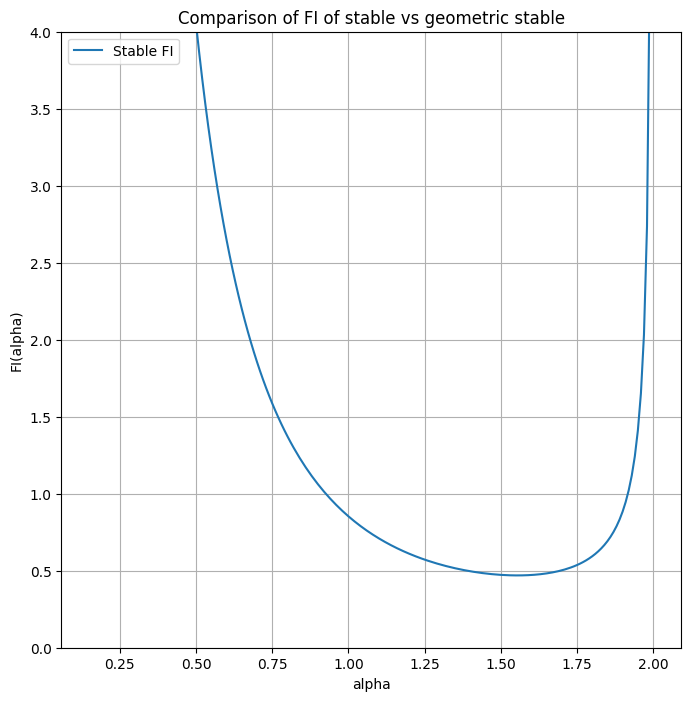

In [ ]:
Alphs = []
Fishr_s = []
for a in np.arange(0.15,2.005,0.01):
    Alphs.append(a)
    T1 = np.arange(0, 40, 0.05)
    T1 = portfolio_of_functions[KEY[3]](T1)    
    Fishr_s.append(fisher_info(T1, a))
fig = plt.figure(figsize=(8, 8))
plt.plot(Alphs, Fishr_s)
plt.ylim([0, 4])
plt.legend(['Stable FI', 'Geometric stable FI'])
plt.xlabel('alpha')
plt.ylabel('FI(alpha)')
plt.grid()
plt.title('Comparison of FI of stable vs geometric stable')

In [ ]:
max(Fishr_s)

352480776638.4512

In [ ]:
print(Alphs)

[0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.2500000000000001, 0.2600000000000001, 0.27000000000000013, 0.28000000000000014, 0.29000000000000015, 0.30000000000000016, 0.31000000000000016, 0.3200000000000002, 0.3300000000000002, 0.3400000000000002, 0.3500000000000002, 0.3600000000000002, 0.3700000000000002, 0.3800000000000002, 0.39000000000000024, 0.40000000000000024, 0.41000000000000025, 0.42000000000000026, 0.43000000000000027, 0.4400000000000003, 0.4500000000000003, 0.4600000000000003, 0.4700000000000003, 0.4800000000000003, 0.4900000000000003, 0.5000000000000003, 0.5100000000000003, 0.5200000000000004, 0.5300000000000004, 0.5400000000000004, 0.5500000000000004, 0.5600000000000004, 0.5700000000000004, 0.5800000000000004, 0.5900000000000004, 0.6000000000000004, 0.6100000000000004, 0.6200000000000004, 0.6300000000000004, 0.6400000000000005, 0.6500000000000005, 0.66

In [ ]:
print(Fishr_s)

[51.38787725510112, 46.21746354669128, 41.52430311219952, 37.32864952134523, 33.62274648826431, 30.37263280147131, 27.527663491860544, 25.032662581574584, 22.836576663833423, 20.89572501819883, 19.173684445125893, 17.640137743955954, 16.26972369113551, 15.041104236116523, 13.936229944486218, 12.939758282227613, 12.038588597718562, 11.22148725506326, 10.478783246591906, 9.802119469081966, 9.18424834400437, 8.618863026276305, 8.100457358564624, 7.624209175529917, 7.185882671383023, 6.781746402897381, 6.408504171062207, 6.063236552975027, 5.743351274440335, 5.446540947699537, 5.170746966334065, 4.914128564818556, 4.675036224345499, 4.451988747851705, 4.243653442251013, 4.048828939907506, 3.866430268467141, 3.695475841557772, 3.535076095159413, 3.3844235377120224, 3.242784017931234, 3.109489044182035, 2.9839290141989823, 2.865547234814062, 2.7538346288718745, 2.648325041255151, 2.548591068384436, 2.454240346082125, 2.3649122396193656, 2.2802748873576864, 2.2000225558698103, 2.1238732699561

Text(0.5, 1.0, 'Comparison of FI of stable vs geometric stable')

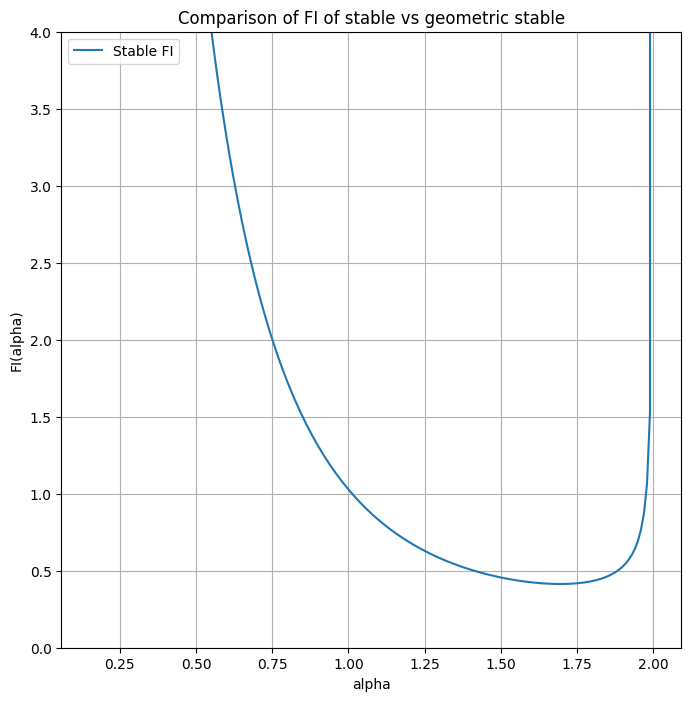

In [ ]:
Alphs = []
Fishr_g = []
for a in np.arange(0.15,2.005,0.01):
    Alphs.append(a)
    T1 = np.arange(0, 40, 0.05)
    T1 = portfolio_of_functions[KEY[3]](T1)    
    Fishr_g.append(fisher_infog(T1, a))
fig = plt.figure(figsize=(8, 8))
plt.plot(Alphs, Fishr_g)
plt.ylim([0, 4])
plt.legend(['Stable FI', 'Geometric stable FI'])
plt.xlabel('alpha')
plt.ylabel('FI(alpha)')
plt.grid()
plt.title('Comparison of FI of stable vs geometric stable')

In [ ]:
print(Alphs)

[0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.2500000000000001, 0.2600000000000001, 0.27000000000000013, 0.28000000000000014, 0.29000000000000015, 0.30000000000000016, 0.31000000000000016, 0.3200000000000002, 0.3300000000000002, 0.3400000000000002, 0.3500000000000002, 0.3600000000000002, 0.3700000000000002, 0.3800000000000002, 0.39000000000000024, 0.40000000000000024, 0.41000000000000025, 0.42000000000000026, 0.43000000000000027, 0.4400000000000003, 0.4500000000000003, 0.4600000000000003, 0.4700000000000003, 0.4800000000000003, 0.4900000000000003, 0.5000000000000003, 0.5100000000000003, 0.5200000000000004, 0.5300000000000004, 0.5400000000000004, 0.5500000000000004, 0.5600000000000004, 0.5700000000000004, 0.5800000000000004, 0.5900000000000004, 0.6000000000000004, 0.6100000000000004, 0.6200000000000004, 0.6300000000000004, 0.6400000000000005, 0.6500000000000005, 0.66

In [ ]:
print(Fishr_g)

[32.49840798385385, 30.52837435537245, 28.671099563536874, 26.9215990197807, 25.27704707304501, 23.734792554720645, 22.2916373107591, 20.943698339019832, 19.686511476654257, 18.515211759261422, 17.42471624554168, 16.409880088895065, 15.465617981744467, 14.586992477755253, 13.769274201928894, 13.007979713176773, 12.298892358114514, 11.63807061302167, 11.021847506779764, 10.446823899251868, 9.909857705678636, 9.40805061147323, 8.938733397995154, 8.49945067757182, 8.087945594568865, 7.702144870618441, 7.34014444131138, 7.000195836944532, 6.680693392125627, 6.380162321190346, 6.097247663202176, 5.830704077839922, 5.579386458790506, 5.342241322182083, 5.11829892251064, 4.906666046254165, 4.706519433068715, 4.517099775492188, 4.337706249987427, 4.167691534607934, 4.006457271328047, 3.853449933983434, 3.7081570656926948, 3.570103852504238, 3.4388500027741786, 3.313986904402574, 3.195135034512141, 3.081941598439695, 2.9740783770205104, 2.871239763082974, 2.7731409698422915, 2.679516395492553, 

In [ ]:
max(Fishr_g)

539955579.6403351